## DAY AGENDA:

- Data PreProcessing by taking titanic.csv
    - handling duplicates
    - checking null values
    - handling missing values
    - standardize the data by using different scaling models
- visualisation data

## 1.Load or Read the data set:

In [1]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Classification/titanic.csv")
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2.Finidng the information about dataset:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

In [6]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [7]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [8]:
df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [10]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [12]:
df['ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [13]:
df.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

## 3. Remove features(Columns)

- drop()

In [16]:
df.drop(['name', 'sibsp', 'parch', 'ticket'], axis=1, inplace=True)
df.head()

,survived,pclass,sex,age,fare,cabin,embarked
0,0,3,male,22.0,7.2500,NaN,S
1,1,1,female,38.0,71.2833,C85,C
2,1,3,female,26.0,7.9250,NaN,S
3,1,1,female,35.0,53.1000,C123,S
4,0,3,male,35.0,8.0500,NaN,S


In [17]:
df.drop('cabin', axis=1, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 41.9+ KB


In [19]:
df.columns


Index(['survived', 'pclass', 'sex', 'age', 'fare', 'embarked'], dtype='object')

## Check NUll values in dataset:

In [20]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
fare          0
embarked      2
dtype: int64

In [21]:
df['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [22]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [23]:
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
fare        0
embarked    2
dtype: int64

In [24]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [25]:
df['embarked'].mode()

0    S
dtype: object

In [26]:
df['embarked'].fillna(df['embarked'].mode, inplace=True)

In [27]:
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
fare        0
embarked    0
dtype: int64

## Converting object data type features into int
- pandas.get_dummies(new columns for every feature value)
- LabelEncoder
- OneHotEncoder

In [28]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [29]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [30]:
import pandas as pd
d1 = pd.get_dummies(df['sex'])
d1

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [31]:
df['sex'].replace('female', 1, inplace=True)

In [32]:
df.head()

,survived,pclass,sex,age,fare,embarked
0,0,3,male,22.0,7.2500,S
1,1,1,1,38.0,71.2833,C
2,1,3,1,26.0,7.9250,S
3,1,1,1,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [33]:
df1 = pd.concat((df, d1), axis = 1)
df1.head()

,survived,pclass,sex,age,fare,embarked,female,male
0,0,3,male,22.0,7.2500,S,0,1
1,1,1,1,38.0,71.2833,C,1,0
2,1,3,1,26.0,7.9250,S,1,0
3,1,1,1,35.0,53.1000,S,1,0
4,0,3,male,35.0,8.0500,S,0,1


In [35]:
df['sex'].replace(1, 'female', inplace=True)
df.head()

,survived,pclass,sex,age,fare,embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   fare      891 non-null    float64
 5   embarked  891 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 41.9+ KB


In [37]:
df1 = pd.read_csv("titanic.csv")
df1.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
df1.drop(['name', 'sibsp', 'ticket', 'cabin', 'parch'], axis = 1, inplace=True)
df1.head()

,survived,pclass,sex,age,fare,embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [41]:
df1['age'].fillna(df1['age'].mean(), inplace=True)

In [42]:
df1['embarked'].fillna("S", inplace=True)

In [43]:
df1.isnull().sum()

survived    0
pclass      0
sex         0
age         0
fare        0
embarked    0
dtype: int64

In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   fare      891 non-null    float64
 5   embarked  891 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 41.9+ KB


In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['sex'] = le.fit_transform(df1['sex'])
df1['embarked'] = le.fit_transform(df1['embarked'])

In [48]:
df1.head()

,survived,pclass,sex,age,fare,embarked
0,0,3,1,22.0,7.2500,2
1,1,1,0,38.0,71.2833,0
2,1,3,0,26.0,7.9250,2
3,1,1,0,35.0,53.1000,2
4,0,3,1,35.0,8.0500,2


In [49]:
df1['sex'].value_counts()

1    577
0    314
Name: sex, dtype: int64

In [50]:
df1['embarked'].value_counts()

2    646
0    168
1     77
Name: embarked, dtype: int64

In [51]:
df1.head()

,survived,pclass,sex,age,fare,embarked
0,0,3,1,22.0,7.2500,2
1,1,1,0,38.0,71.2833,0
2,1,3,0,26.0,7.9250,2
3,1,1,0,35.0,53.1000,2
4,0,3,1,35.0,8.0500,2


In [52]:
df.describe()

,survived,pclass,age,fare
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,13.002015,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,22.000000,7.910400
50%,0.000000,3.000000,29.699118,14.454200
75%,1.000000,3.000000,35.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


## Scaling the features in the same range:

- standard scaler
    - mean = 0, std = 1
- minmax scaler
     - [0, 1]
- robust scaler
    - iQrange
- normalizer
    - Row wise -[0, 1]

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
s=StandardScaler()
m=MinMaxScaler()
r=RobustScaler()
n=Normalizer()

In [54]:
s1=s.fit_transform(df1) 
m1=m.fit_transform(df1)
r1=r.fit_transform(df1)
n1=n.fit_transform(df1)

In [55]:
import matplotlib.pyplot as plt

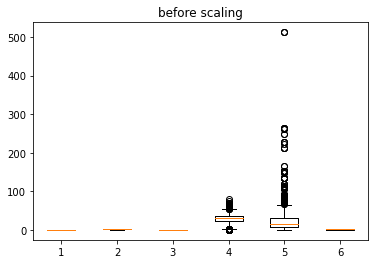

In [56]:
plt.boxplot(df1)
plt.title("before scaling")
plt.show()

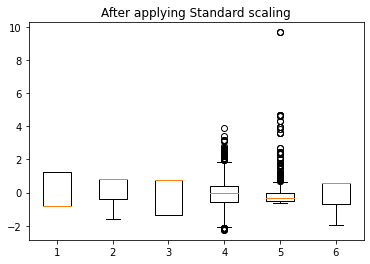

In [57]:
plt.boxplot(s1)
plt.title("After applying Standard scaling")
plt.show()

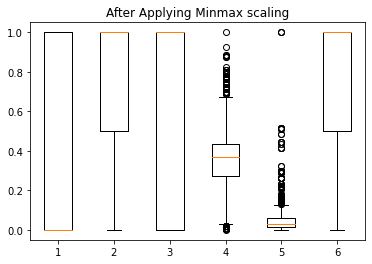

In [61]:
plt.boxplot(m1)
plt.title("After Applying Minmax scaling")
plt.show()

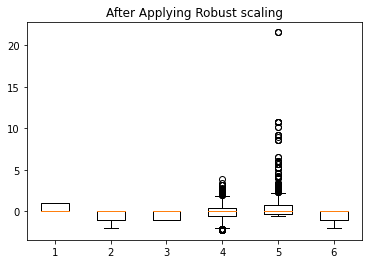

In [60]:
plt.boxplot(r1)
plt.title("After Applying Robust scaling")
plt.show()

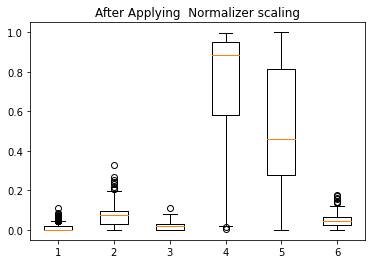

In [63]:
plt.boxplot(n1)
plt.title("After Applying  Normalizer scaling")
plt.show()